# Plotting stuff for my research report, CSE527

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## Generating delta OGT vs 16S quality plot

In [6]:
sns.set_context('talk')

In [7]:
df_ogt = pd.read_csv('../data/taxa/labels.csv', index_col=0)

In [8]:
df_ogt.describe()

,ogt
count,4424.000000
mean,31.113743
std,8.568326
min,6.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,105.000000


In [9]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None).sample(1500)

In [10]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000
mean,8288.469333,7942.537333,3.880983e-16,0.669802,0.605475,0.823499,0.800630
std,4833.487232,4650.581305,1.400517e-14,0.213061,0.247937,0.056089,0.229640
min,24.000000,13.000000,0.000000e+00,0.031332,0.031778,0.720339,0.031796
25%,4029.250000,3884.750000,0.000000e+00,0.648632,0.431491,0.789716,0.649730
50%,8197.000000,7759.500000,0.000000e+00,0.764346,0.689464,0.810533,0.855577
75%,12416.000000,11971.000000,2.352850e-100,0.802610,0.796897,0.835061,0.995338
max,16626.000000,16596.000000,5.420940e-13,0.967742,0.934873,1.000000,0.999361


In [11]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [12]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [13]:
assert len(meso_OGT) == len(thermo_OGT)

In [14]:
delta_OGT = thermo_OGT.values - meso_OGT.values
log_delta_OGT = np.log(delta_OGT)

In [15]:
df_16s['delta_OGT'] = delta_OGT
df_16s['log_delta_OGT'] = log_delta_OGT

In [16]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8288.469333,7942.537333,3.880983e-16,0.669802,0.605475,0.823499,0.800630,26.062233,3.145975
std,4833.487232,4650.581305,1.400517e-14,0.213061,0.247937,0.056089,0.229640,11.611920,0.514791
min,24.000000,13.000000,0.000000e+00,0.031332,0.031778,0.720339,0.031796,1.000000,0.000000
25%,4029.250000,3884.750000,0.000000e+00,0.648632,0.431491,0.789716,0.649730,17.375000,2.854954
50%,8197.000000,7759.500000,0.000000e+00,0.764346,0.689464,0.810533,0.855577,25.000000,3.218876
75%,12416.000000,11971.000000,2.352850e-100,0.802610,0.796897,0.835061,0.995338,33.000000,3.496508
max,16626.000000,16596.000000,5.420940e-13,0.967742,0.934873,1.000000,0.999361,68.500000,4.226834


In [17]:
log_E_value= np.log(df_16s["local_E_value"])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
df_16s['log_E_value'] = log_E_value

In [19]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT,log_E_value
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8288.469333,7942.537333,3.880983e-16,0.669802,0.605475,0.823499,0.800630,26.062233,3.145975,-inf
std,4833.487232,4650.581305,1.400517e-14,0.213061,0.247937,0.056089,0.229640,11.611920,0.514791,NaN
min,24.000000,13.000000,0.000000e+00,0.031332,0.031778,0.720339,0.031796,1.000000,0.000000,-inf
25%,4029.250000,3884.750000,0.000000e+00,0.648632,0.431491,0.789716,0.649730,17.375000,2.854954,NaN
50%,8197.000000,7759.500000,0.000000e+00,0.764346,0.689464,0.810533,0.855577,25.000000,3.218876,NaN
75%,12416.000000,11971.000000,2.352850e-100,0.802610,0.796897,0.835061,0.995338,33.000000,3.496508,-230.179055
max,16626.000000,16596.000000,5.420940e-13,0.967742,0.934873,1.000000,0.999361,68.500000,4.226834,-28.243337


<AxesSubplot:xlabel='Local E value', ylabel='$ \\Delta OGT $'>

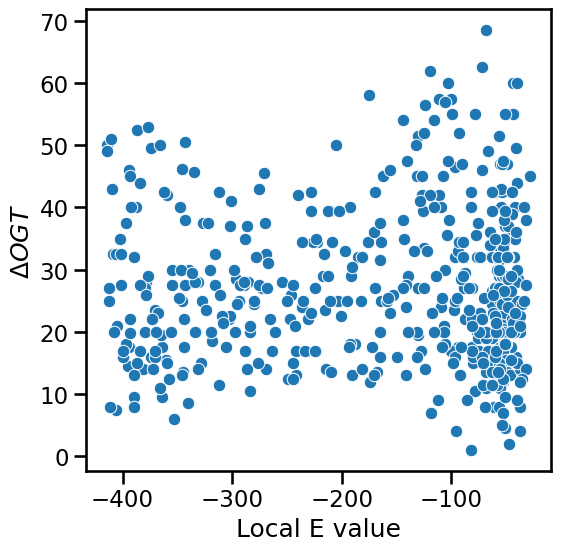

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Local E value')
ax.set_ylabel('$ \Delta OGT $')
sns.scatterplot(x='log_E_value', y='delta_OGT', data=df_16s)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


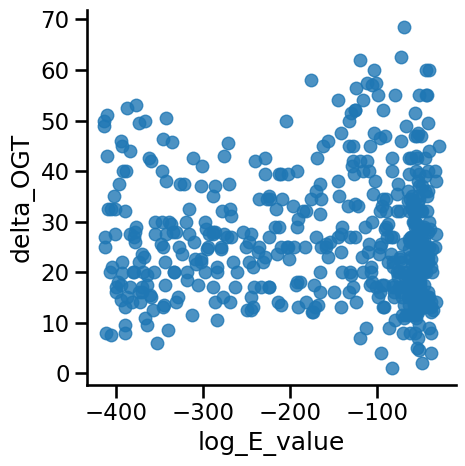

In [21]:
sns.lmplot(x='log_E_value', y='delta_OGT', data=df_16s)

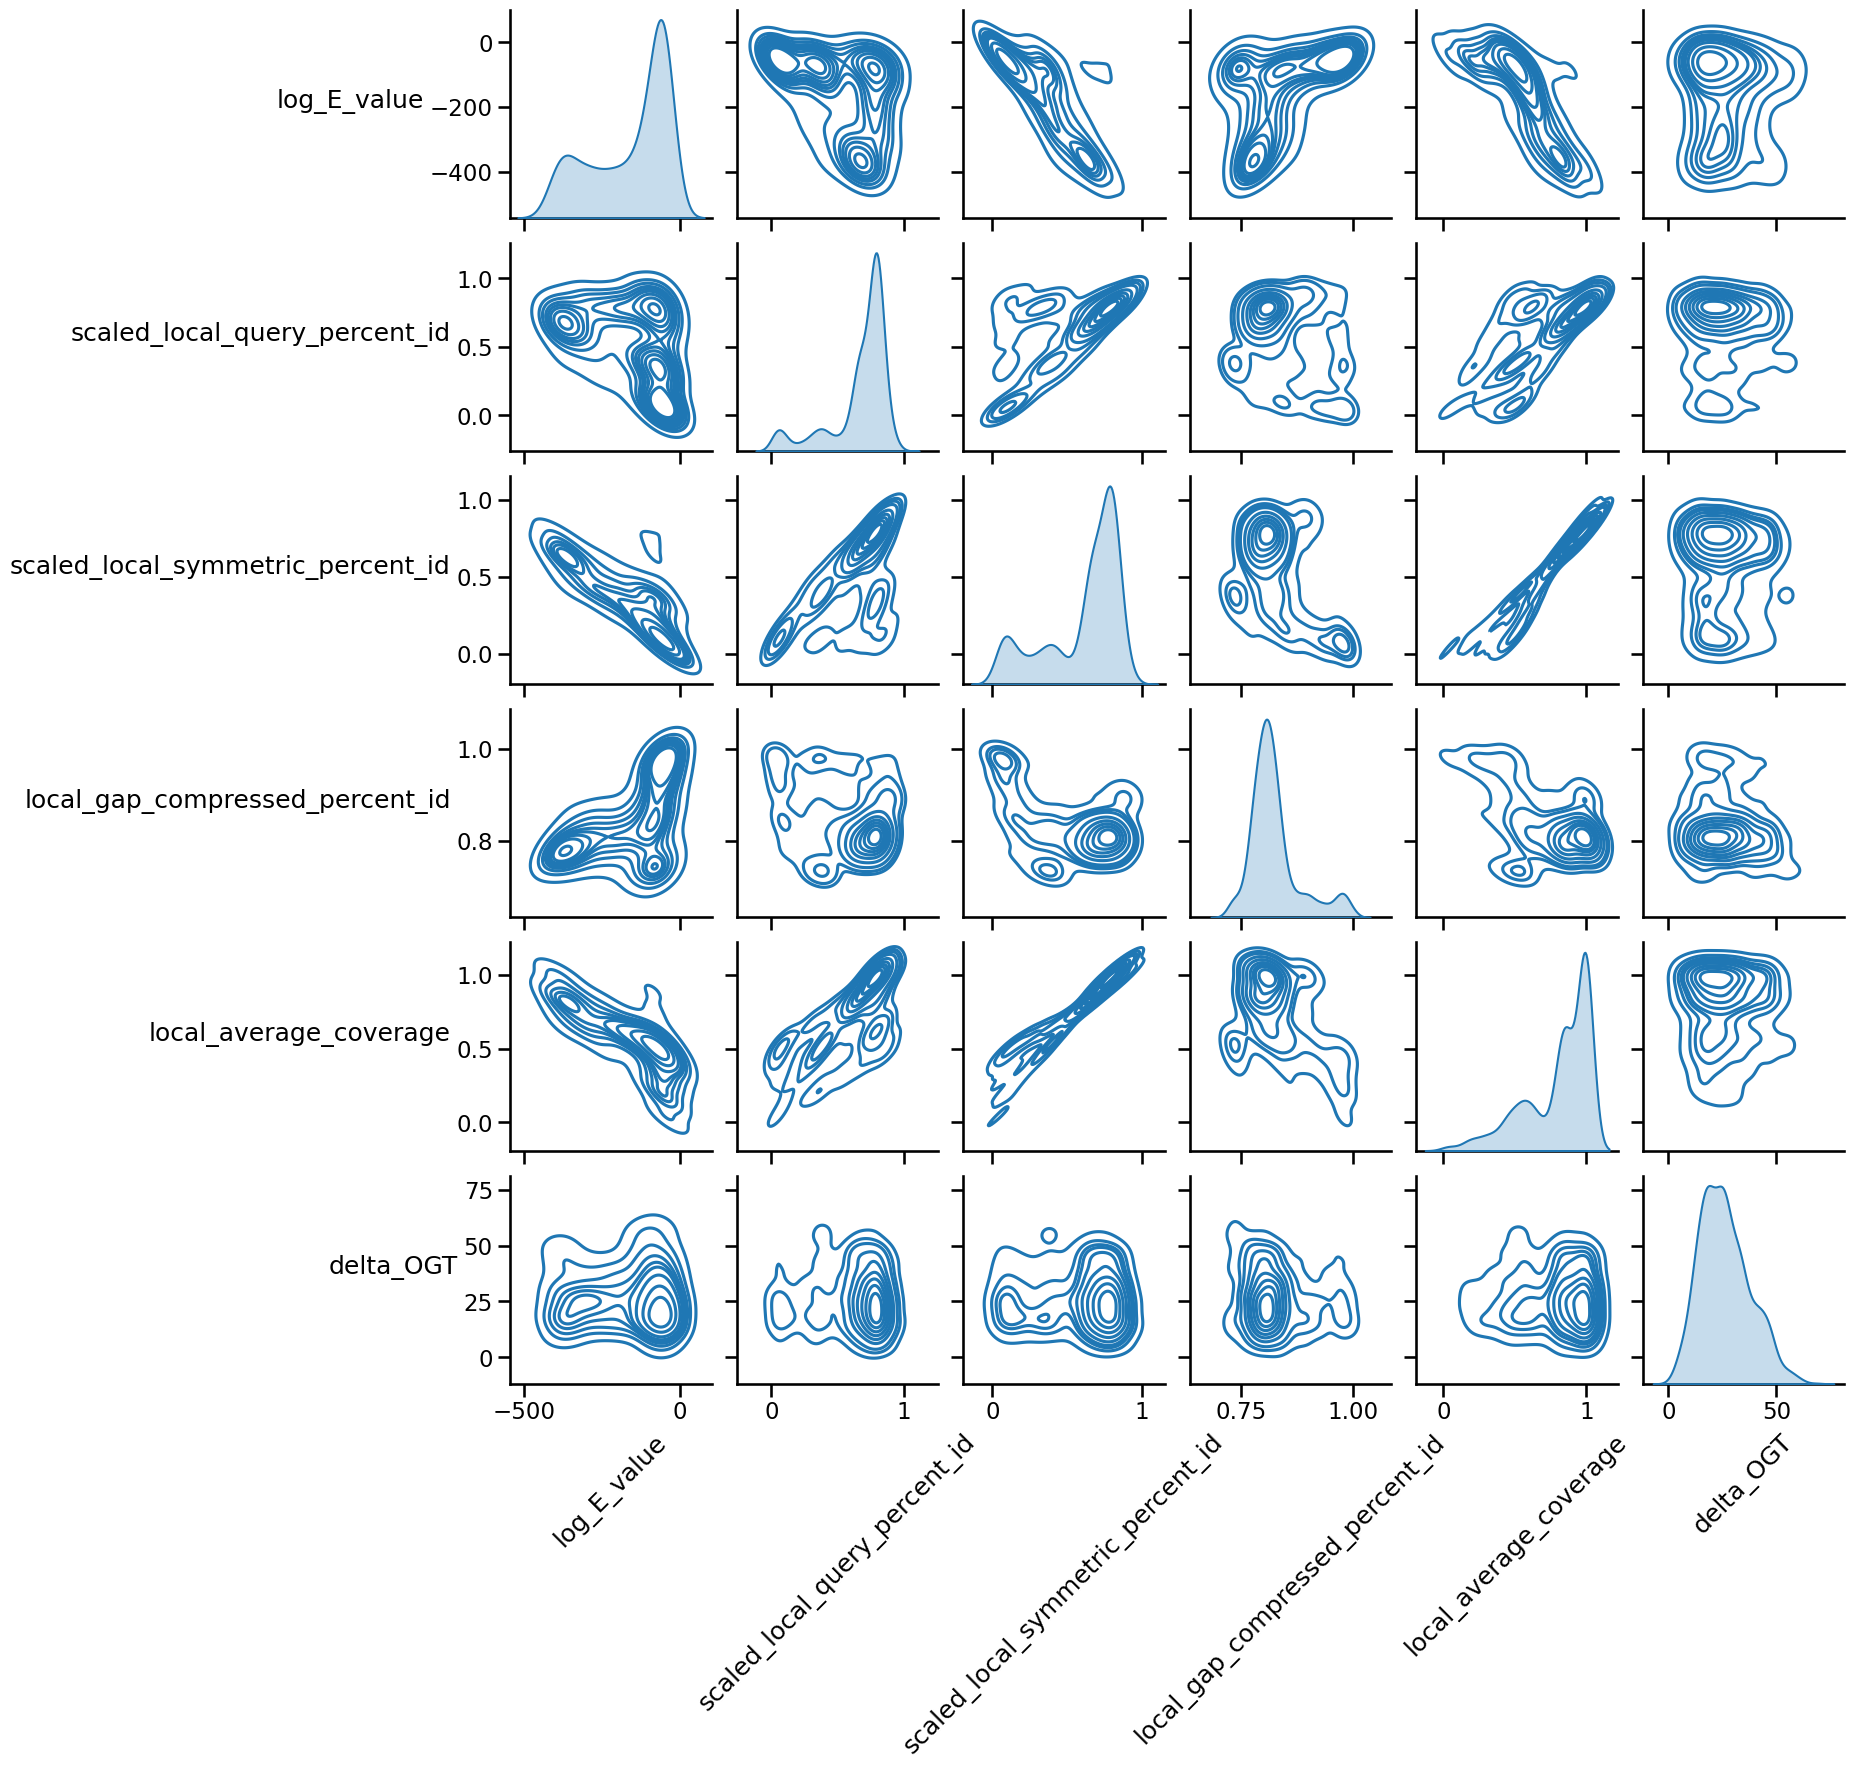

In [22]:
g = sns.pairplot(df_16s, vars = ['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage', 'delta_OGT'], kind="kde")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

In [23]:
# g.axes.shape
g.axes[1,2].get_xlabel()

'scaled_local_symmetric_percent_id'

<AxesSubplot:>

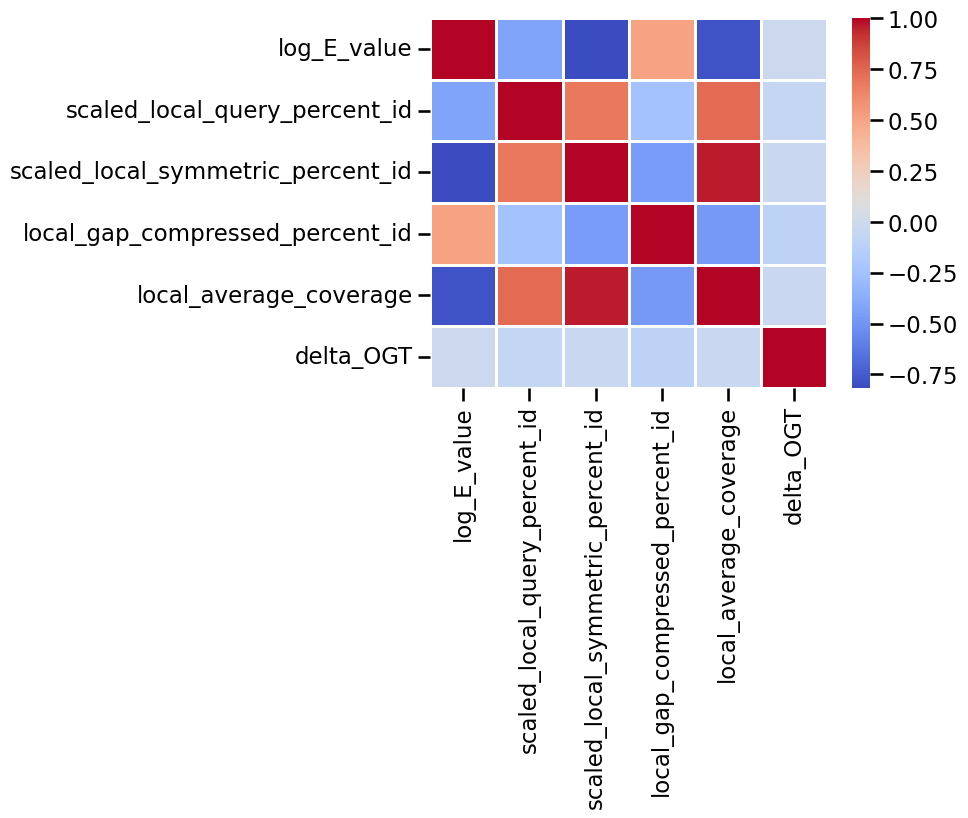

In [24]:
cormat=df_16s[['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage','delta_OGT']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

The above suggests that the 16S alignment quality is weakly correlated with $ \Delta OGT $ which suggests that the 16S rRNA sequence that defines an organism (taxa) doesn't give us a lot of information apropos if the organism is a mesophile or a thermophile.

## Aiming to generate deltaOGT vs protein alignment quality

In [25]:
# This is my path
path = "../data/taxa_pairs/protein_alignment/"

# to store files in a list
list = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if 'taxa_pair' in f:
			list.append(f)

In [26]:
list

['taxa_pair_14963-4886.csv',
 'taxa_pair_10050-2498.csv',
 'taxa_pair_8919-6836.csv',
 'taxa_pair_7134-7388.csv',
 'taxa_pair_14963-6049.csv',
 'taxa_pair_15190-14746.csv',
 'taxa_pair_7134-8905.csv',
 'taxa_pair_1462-9035.csv',
 'taxa_pair_5381-6187.csv',
 'taxa_pair_7134-15628.csv',
 'taxa_pair_4107-10206.csv',
 'taxa_pair_5381-11261.csv',
 'taxa_pair_10952-1792.csv',
 'taxa_pair_16361-16620.csv',
 'taxa_pair_15966-10926.csv',
 'taxa_pair_1462-2612.csv',
 'taxa_pair_14963-7343.csv',
 'taxa_pair_12872-12178.csv',
 'taxa_pair_1674-10646.csv',
 'taxa_pair_7470-2132.csv',
 'taxa_pair_7134-11328.csv',
 'taxa_pair_37-1613.csv',
 'taxa_pair_10686-10819.csv',
 'taxa_pair_875-5923.csv',
 'taxa_pair_7134-250.csv',
 'taxa_pair_11324-8568.csv',
 'taxa_pair_3606-647.csv',
 'taxa_pair_1724-3735.csv',
 'taxa_pair_5381-15991.csv',
 'taxa_pair_10686-753.csv',
 'taxa_pair_15190-2297.csv',
 'taxa_pair_6626-9613.csv',
 'taxa_pair_10952-14640.csv',
 'taxa_pair_9827-15634.csv',
 'taxa_pair_14963-13002.csv

In [27]:
Listofdf = []
for i in list[0:100]:
    df_ProtPair = pd.read_csv('../data/taxa_pairs/protein_alignment/'+i, index_col=0)
    Listofdf.append(df_ProtPair)

In [28]:
df_AllProPair = pd.concat(Listofdf)

In [29]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00


In [30]:
log_protE_value= np.log(df_AllProPair["local_E_value"])

In [31]:
df_AllProPair['Log_E_value'] = log_protE_value

In [32]:
df_AllProPair['thermo_protein_id'].apply(int)

0        14963
1        14963
2        14963
3        14963
4        14963
         ...  
22338    15966
22339    15966
22340    15966
22341    15966
22342    15966
Name: thermo_protein_id, Length: 1282840, dtype: int64

In [33]:
df_ogt.columns

Index(['ogt', 'thermophile_label'], dtype='object')

In [34]:
thermopair_OGT = df_ogt.loc[df_AllProPair['thermo_protein_id'].apply(int)]['ogt']

In [35]:
mesopair_OGT = df_ogt.loc[df_AllProPair['meso_protein_id'].apply(int)]['ogt']

In [36]:
assert len(thermopair_OGT) == len(mesopair_OGT)

In [37]:
delta_OGT_pair = thermopair_OGT.values - mesopair_OGT.values

In [38]:
df_AllProPair['delta_OGT_pair'] = delta_OGT_pair

In [39]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value,delta_OGT_pair
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01,-5.171925e+01,1.678851e+01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02,5.920866e+01,6.183858e+00
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01,-6.418731e+02,4.000000e+00
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01,-6.196278e+01,1.300000e+01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01,-3.640958e+01,1.600000e+01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01,-1.690117e+01,2.000000e+01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.605170e+00,4.100000e+01


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

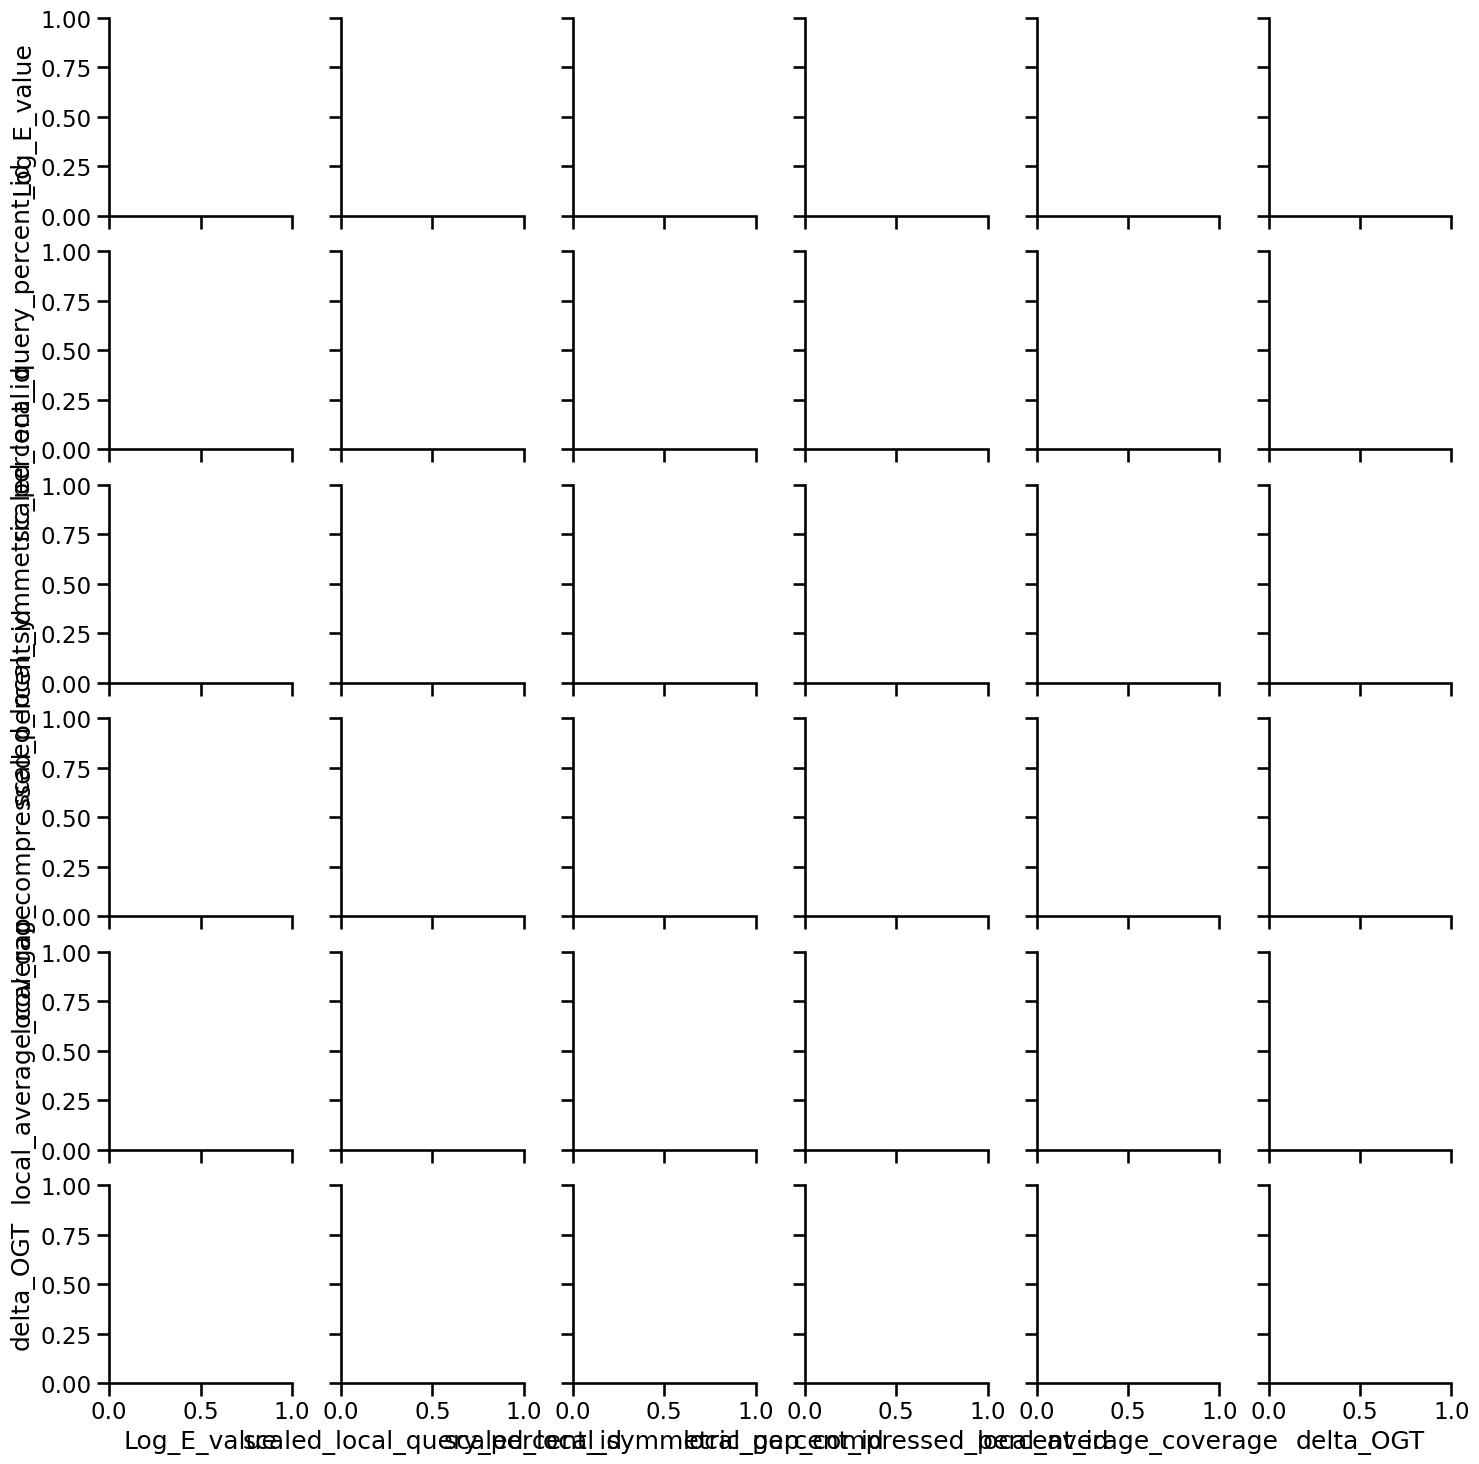

In [116]:
g2 = sns.pairplot(df_AllProPair.sample(1500), vars = ['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage', 'delta_OGT'], kind="kde")
for ax in g2.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

<AxesSubplot:>

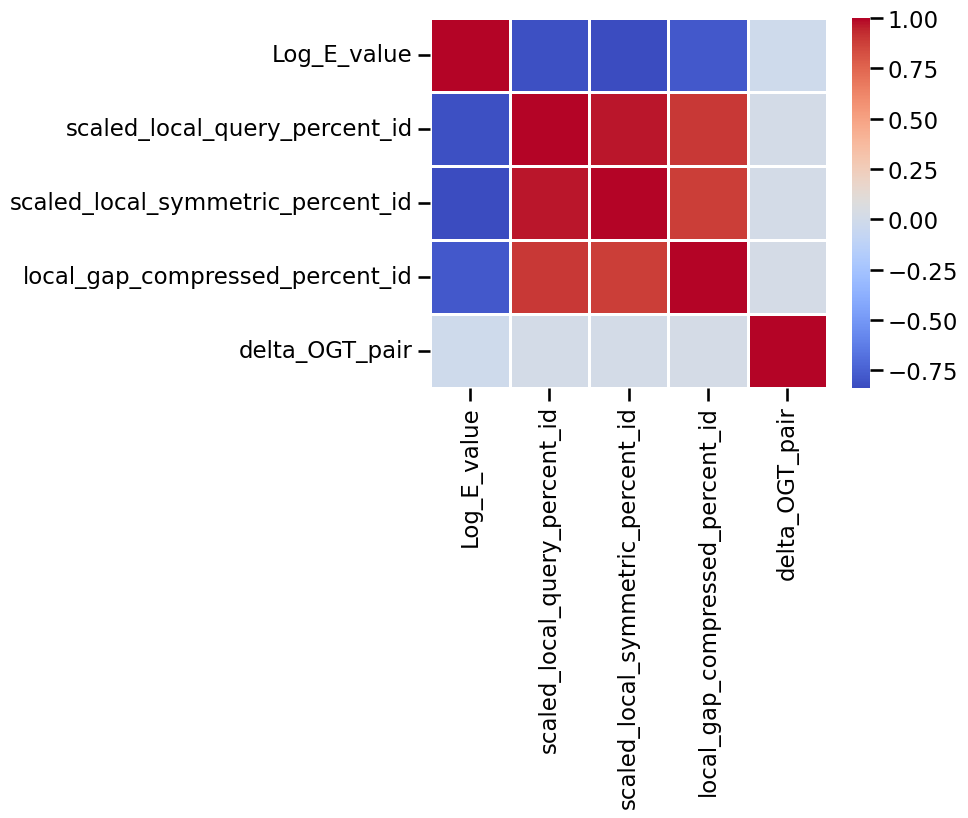

In [40]:
cormat=df_AllProPair[['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','delta_OGT_pair']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

## Generating number of hits vs 16S quality

In [70]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None)

In [71]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450


In [72]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [73]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [74]:
assert len(meso_OGT) == len(thermo_OGT)

In [75]:
delta_OGT = thermo_OGT.values - meso_OGT.values

In [76]:
df_16s['delta_OGT'] = delta_OGT

In [77]:
log_E_value= np.log(df_16s["local_E_value"])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
df_16s['log_E_value'] = log_E_value

In [79]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
count,750633.000000,750633.000000,7.506330e+05,750633.000000,750633.000000,750633.000000,750633.000000,750633.000000,7.506330e+05
mean,8457.502636,8082.160624,7.732823e-12,0.667429,0.605776,0.822348,0.798307,25.851470,-inf
std,4862.021723,4646.578599,1.765127e-09,0.211535,0.244945,0.054200,0.228732,11.882097,NaN
min,24.000000,5.000000,0.000000e+00,0.013170,0.021458,0.704718,0.022761,1.000000,-inf
25%,3997.000000,4043.000000,0.000000e+00,0.643177,0.427087,0.790074,0.643901,17.000000,NaN
50%,8529.000000,8043.000000,0.000000e+00,0.757962,0.688264,0.812166,0.852390,24.500000,NaN
75%,12717.000000,12069.000000,1.170250e-104,0.801040,0.795761,0.834335,0.995348,32.500000,-2.393116e+02
max,16650.000000,16663.000000,7.548360e-07,1.000000,0.996439,1.000000,0.999450,98.000000,-1.409677e+01


#### Reading the hits dataframe

In [87]:
df_hits = pd.read_csv('../data/taxa_pairs/protein_alignment/completion_state.metadat', index_col=0)

In [88]:
df_hits.describe()

,pw_space,hits,execution_time,emissions
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04
std,5.955803e+06,9054.429118,0.373517,9.829943e-05
min,1.335740e+06,0.000000,0.373392,4.903634e-07
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04
max,4.996694e+07,89124.000000,3.277508,6.831047e-04


In [89]:
df_hits

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...,...
14107,12872-2738,20495936,27972,1.047133,NaN
14108,10952-3236,19243680,38700,1.220994,NaN
14109,8919-11428,16556661,39458,1.211858,NaN
14110,10686-6364,9295668,10260,1.105279,NaN


In [90]:
df_hits['pair']

0          88-12000
1         1844-1896
2           49-6698
3        11324-3104
4         3841-1514
            ...    
14107    12872-2738
14108    10952-3236
14109    8919-11428
14110    10686-6364
14111    10952-4046
Name: pair, Length: 14112, dtype: object

In [84]:
# Bad work around, but time crunch
# df_hits['pair'] = df_hits['pair'].str.replace('-', '.').astype(float)

In [85]:
# df_hits['pair'].apply(int)

0           88
1         1844
2           49
3        11324
4         3841
         ...  
14107    12872
14108    10952
14109     8919
14110    10686
14111    10952
Name: pair, Length: 14112, dtype: int64

In [57]:
# df_16s.loc[df_hits['pair'].apply(int)]['log_E_value']

In [91]:
df_hits.head()

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186


In [92]:
df_16s.head()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
0,24,1501,0.0,0.800129,0.801158,0.803744,0.997426,32.5,-inf
1,24,10270,0.0,0.800771,0.802318,0.807518,0.996136,35.0,-inf
2,24,10294,0.0,0.799486,0.800772,0.803618,0.996138,31.5,-inf
3,24,14090,0.0,0.804627,0.802307,0.804627,0.996155,28.0,-inf
4,24,12269,0.0,0.797558,0.799099,0.804799,0.996136,35.0,-inf


In [93]:
def my_func(x):
    return str(int(x['thermo_index'])) + '-' + str(int(x['meso_index']))

In [94]:
df_16s['pair_index'] = df_16s.apply(my_func, axis=1)

In [95]:
df_16s

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value,pair_index
0,24,1501,0.000000e+00,0.800129,0.801158,0.803744,0.997426,32.5,-inf,24-1501
1,24,10270,0.000000e+00,0.800771,0.802318,0.807518,0.996136,35.0,-inf,24-10270
2,24,10294,0.000000e+00,0.799486,0.800772,0.803618,0.996138,31.5,-inf,24-10294
3,24,14090,0.000000e+00,0.804627,0.802307,0.804627,0.996155,28.0,-inf,24-14090
4,24,12269,0.000000e+00,0.797558,0.799099,0.804799,0.996136,35.0,-inf,24-12269
...,...,...,...,...,...,...,...,...,...,...
750628,16650,14843,1.008060e-17,0.152561,0.113787,0.810651,0.151849,11.0,-39.135919,16650-14843
750629,16650,5961,1.008060e-17,0.150334,0.112313,0.798817,0.151995,16.0,-39.135919,16650-5961
750630,16650,16094,3.662080e-17,0.134744,0.100749,0.812081,0.134616,13.0,-37.845915,16650-16094
750631,16650,11097,1.330360e-16,0.150334,0.111987,0.794118,0.151740,11.0,-36.555912,16650-11097


In [96]:
df_16s = df_16s.set_index('pair_index')

In [97]:
df_16s

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
pair_index,,,,,,,,,
24-1501,24,1501,0.000000e+00,0.800129,0.801158,0.803744,0.997426,32.5,-inf
24-10270,24,10270,0.000000e+00,0.800771,0.802318,0.807518,0.996136,35.0,-inf
24-10294,24,10294,0.000000e+00,0.799486,0.800772,0.803618,0.996138,31.5,-inf
24-14090,24,14090,0.000000e+00,0.804627,0.802307,0.804627,0.996155,28.0,-inf
24-12269,24,12269,0.000000e+00,0.797558,0.799099,0.804799,0.996136,35.0,-inf
...,...,...,...,...,...,...,...,...,...
16650-14843,16650,14843,1.008060e-17,0.152561,0.113787,0.810651,0.151849,11.0,-39.135919
16650-5961,16650,5961,1.008060e-17,0.150334,0.112313,0.798817,0.151995,16.0,-39.135919
16650-16094,16650,16094,3.662080e-17,0.134744,0.100749,0.812081,0.134616,13.0,-37.845915


In [98]:
df_hits

,pair,pw_space,hits,execution_time,emissions
0,88-12000,2859344,3792,0.404400,0.000113
1,1844-1896,7081240,6633,0.533380,0.000158
2,49-6698,5544090,6534,0.660562,0.000184
3,11324-3104,5273579,4918,0.655736,0.000182
4,3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...,...
14107,12872-2738,20495936,27972,1.047133,NaN
14108,10952-3236,19243680,38700,1.220994,NaN
14109,8919-11428,16556661,39458,1.211858,NaN
14110,10686-6364,9295668,10260,1.105279,NaN


In [99]:
df_hits = df_hits.set_index('pair')

In [100]:
df_hits

,pw_space,hits,execution_time,emissions
pair,,,,
88-12000,2859344,3792,0.404400,0.000113
1844-1896,7081240,6633,0.533380,0.000158
49-6698,5544090,6534,0.660562,0.000184
11324-3104,5273579,4918,0.655736,0.000182
3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...
12872-2738,20495936,27972,1.047133,NaN
10952-3236,19243680,38700,1.220994,NaN
8919-11428,16556661,39458,1.211858,NaN


In [101]:
df_16s.loc[df_hits.index]

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_E_value
pair,,,,,,,,,
88-12000,88,12000,0.000000e+00,0.934095,0.909925,0.939148,0.969617,34.0,-inf
1844-1896,1844,1896,3.966130e-25,0.927536,0.882759,0.955224,0.912471,35.0,-56.186837
49-6698,49,6698,5.476430e-39,0.977528,0.945652,0.977528,0.957540,16.0,-88.100365
11324-3104,11324,3104,0.000000e+00,0.886472,0.882273,0.885268,0.999323,32.0,-inf
3841-1514,3841,1514,0.000000e+00,0.888464,0.893876,0.895311,0.996152,31.0,-inf
...,...,...,...,...,...,...,...,...,...
12872-2738,12872,2738,0.000000e+00,0.969895,0.970848,0.969895,0.999345,14.0,-inf
10952-3236,10952,3236,0.000000e+00,0.920646,0.921265,0.919409,0.999327,11.0,-inf
8919-11428,8919,11428,0.000000e+00,0.983040,0.984324,0.986257,0.999347,6.0,-inf


In [102]:
df_16s.loc['16361-16204']

thermo_index                         1.636100e+04
meso_index                           1.620400e+04
local_E_value                        0.000000e+00
scaled_local_query_percent_id        9.000680e-01
scaled_local_symmetric_percent_id    8.997621e-01
local_gap_compressed_percent_id      8.933873e-01
local_average_coverage               9.993204e-01
delta_OGT                            5.000000e+00
log_E_value                                  -inf
Name: 16361-16204, dtype: float64

In [103]:
df_hits['log_E_value'] = df_16s.loc[df_hits.index]['log_E_value']

In [104]:
df_hits.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,pw_space,hits,execution_time,emissions,log_E_value
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03,1.411200e+04
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04,-inf
std,5.955803e+06,9054.429118,0.373517,9.829943e-05,NaN
min,1.335740e+06,0.000000,0.373392,4.903634e-07,-inf
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04,NaN
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04,NaN
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04,NaN
max,4.996694e+07,89124.000000,3.277508,6.831047e-04,-4.343766e+01


In [105]:
df_hits['#hit%'] = df_hits['hits']/df_hits['pw_space']

In [106]:
df_hits['local_gap_compressed_percent_id'] = df_16s.loc[df_hits.index]['local_gap_compressed_percent_id']

In [107]:
df_hits['scaled_local_query_percent_id'] = df_16s.loc[df_hits.index]['scaled_local_query_percent_id'] 

In [108]:
df_hits['scaled_local_symmetric_percent_id'] = df_16s.loc[df_hits.index]['scaled_local_symmetric_percent_id'] 

In [109]:
df_hits.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,pw_space,hits,execution_time,emissions,log_E_value,#hit%,local_gap_compressed_percent_id,scaled_local_query_percent_id,scaled_local_symmetric_percent_id
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03,1.411200e+04,14112.000000,14112.000000,14112.000000,14112.000000
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04,-inf,0.001137,0.905602,0.902327,0.903584
std,5.955803e+06,9054.429118,0.373517,9.829943e-05,NaN,0.000356,0.018601,0.018356,0.017438
min,1.335740e+06,0.000000,0.373392,4.903634e-07,-inf,0.000000,0.873467,0.806452,0.880026
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04,NaN,0.000936,0.891852,0.889606,0.890080
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04,NaN,0.001134,0.902722,0.900196,0.900946
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04,NaN,0.001342,0.914384,0.911649,0.912698
max,4.996694e+07,89124.000000,3.277508,6.831047e-04,-4.343766e+01,0.003856,1.000000,0.998709,0.996439


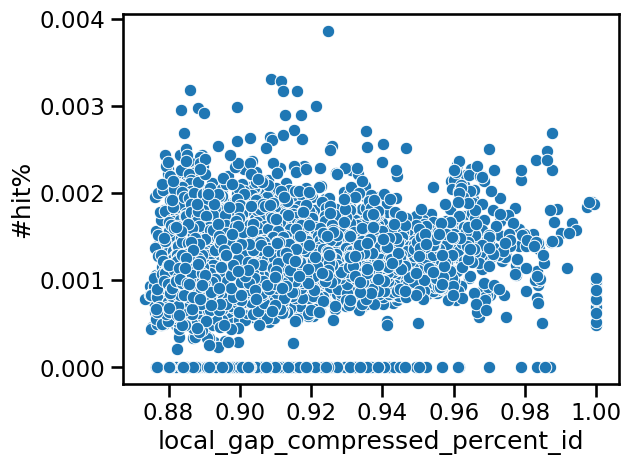

In [110]:
g2 = sns.scatterplot(x='local_gap_compressed_percent_id', y='#hit%', data=df_hits)

In [111]:
# df_hits.sample(100).plot.hexbin(x='local_gap_compressed_percent_id', y='#hit%', gridsize=2)

In [112]:
help(df_hits.plot.hexbin)

Help on method hexbin in module pandas.plotting._core:

hexbin(x, y, C=None, reduce_C_function=None, gridsize=None, **kwargs) method of pandas.plotting._core.PlotAccessor instance
    Generate a hexagonal binning plot.
    
    Generate a hexagonal binning plot of `x` versus `y`. If `C` is `None`
    (the default), this is a histogram of the number of occurrences
    of the observations at ``(x[i], y[i])``.
    
    If `C` is specified, specifies values at given coordinates
    ``(x[i], y[i])``. These values are accumulated for each hexagonal
    bin and then reduced according to `reduce_C_function`,
    having as default the NumPy's mean function (:meth:`numpy.mean`).
    (If `C` is specified, it must also be a 1-D sequence
    of the same length as `x` and `y`, or a column label.)
    
    Parameters
    ----------
    x : int or str
        The column label or position for x points.
    y : int or str
        The column label or position for y points.
    C : int or str, optional
  